In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

%matplotlib inline

Data from: https://www.kaggle.com/c/nfl-big-data-bowl-2022/data?select=players.csv

**Player data:**
* `nflId`: Player identification number, unique across players (numeric)
* `Height`: Player height (text)
* `Weight`: Player weight (numeric)
* `birthDate`: Date of birth (YYYY-MM-DD)
* `collegeName`: Player college (text)
* `Position`: Player position (text)
* `displayName`: Player name (text)

In [2]:
# import data
players_df = pd.read_csv("datasets/players.csv")
players_df.head(3)

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem


In [3]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        2732 non-null   int64 
 1   height       2732 non-null   object
 2   weight       2732 non-null   int64 
 3   birthDate    2715 non-null   object
 4   collegeName  2724 non-null   object
 5   Position     2732 non-null   object
 6   displayName  2732 non-null   object
dtypes: int64(2), object(5)
memory usage: 149.5+ KB


**Converting feet into cm**

In [4]:
# looking at the "height" variable
dict(players_df.height.value_counts()).keys()

dict_keys(['6-3', '6-2', '6-4', '6-1', '6-0', '6-5', '5-11', '5-10', '6-6', '5-9', '6-7', '5-8', '75', '6-8', '72', '73', '74', '77', '71', '76', '70', '78', '5-7', '6-9', '5-6', '68', '69', '79', '66', '67'])

In [5]:
# converting hight feet into cm
def convert_height(variable):
    '''
    Docstring: function to convert feet into cm
    '''
    
    values = []
    
    # iterator
    for val in variable:
        
        if len(val) != 2:
            result = float(val[0] + "." + val[2:]) * 30.48
            values.append(round(result, 2))
            
        else:
            result = float(val[0] + "." + val[1]) * 30.48
            values.append(round(result, 2))
            
    return values
    

In [6]:
cm = convert_height(players_df.height)
players_df["height_cm"] = cm
players_df.head(3)

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_cm
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,185.93
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,182.88
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,182.88


**Converting punds into kg**

In [7]:
players_df["weight_kg"] = round(players_df.weight / 2.2046, 2)

In [8]:
players_df.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_cm,weight_kg
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,185.93,94.35
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,182.88,99.79
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,182.88,92.99
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,185.93,106.60
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,185.93,107.05


# Random Sampling

**Sample -** Portion of the entire population. A subset of a large data set (e.g., impossible to get all the data, the data is to big to process)

**Population -** All the data avilabale

**N -** Population size

**n -** Sample size

**Random Sampling -** Randomly picking data from the population

**Stratefied Sampling -** When we put some parameters on the sample where we require an even number of subjects from different groups

**Simple Random Sampling -** When we assign subjects to groups in a totally random way. We can end up with a skewed sample (to fix problems like this use `Stratefied Sampling`)

**Bias -** Systematic error (something that skews our results and makes them inaccurate)

**Sample Bias -** A sample that misrepresents the population

**$\hat{x}$ -** Mean of the sample (x hat)

**$\mu$ -** Population mean (miu)

# Selection Bias

**Selection Bies -** Bias that results from how observations in the data are selected. When we don't collect data from an entire group of subjects that should have been included in our data (e.g., polling one city when you want to understand the political leanings of the entire country)

**Data Snooping -** Extensive hunting through data in search of something interesting ("If you torture your data long enough, sooner or later it will confess") To prevent this, it's important that you split your data into `train` and `test` sets, so you you have a part of the data your're not looking at prior to modeling.

**Vast Search Effect -** A form a selection bias. If you repeatedly run different models
and ask different questions with a large data set, you are bound to find something
interesting. But is the result you found truly something interesting, or is it the chance
outlier? One way to avoid this, is to have a holdout set of data that one can test their conclusions on (split the data into `train` and `test` sets).

**Target Shuffling -** https://www.youtube.com/watch?v=4i5cX36waH4

**Regression the the Mean -**  A phenomenon involving successive measurements on a given variable: extreme observations tend to be followed by more central ones. (e.g., If your favourite sports team won the championship last year, what does that mean for their chances for winning next season? To the extent this result is due to skill (the team is in good condition, with a top coach, etc.), their win signals that it is more likely they will win again next year. But the greater the extent this is due to luck (other teams embroiled in a drug scandal, favourable draw, draft picks turned out to be productive, etc.), the less likely it is they will win again next year.)

# Sampling Distribution of a Statistic

**Sample statistic -** Metrics calculated for a sample of data drawn from a larger population (mean, median, ....)

**Data Distribution -** The frequency distributions of `individual` values in a dataset.

**Sampling Distribution -** The frequency distribution of a `sample statistic` over many samples or resamples.

**Central Limit Theorem -** The tendency of the sampling distribution to take on a normal shape as the sample size rises

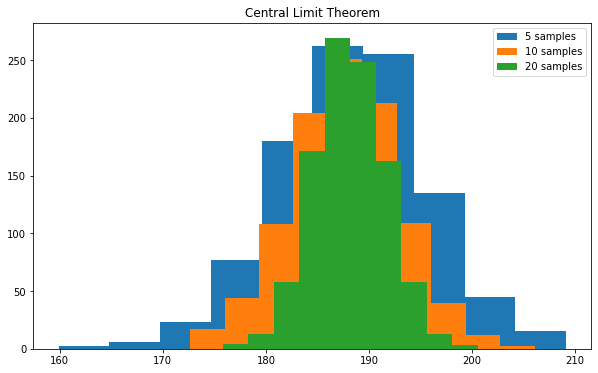

In [9]:
# setting number of samples (5, 10, and 20)
sample_amounts = [5, 10, 20]

plt.figure(figsize=(10,6))

for x in sample_amounts:
    sample = []
    
    for i in range(1000):
        sample.append(players_df.height_cm.sample(x).mean())
    plt.hist(sample)
    
plt.legend([str(num) + " samples" for num in sample_amounts])
plt.title("Central Limit Theorem");

**Standard Error -** The variability (SD) of a sampple statistic over many samples. As the sample size increases, the stadard error decreases.
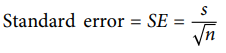

In [10]:
# standard error for all the numeric variables in the data set
players_df.sem()

nflId        92.793692
weight        0.893608
height_cm     0.313076
weight_kg     0.405338
dtype: float64

Drawing new samples is typically very wasteful. Modern statistics favors the `Bootstrap`

# The Bootstrap 

`It does not necessarily involve any assumptions about the data or the sample statistic being normally distributed.`


**Bootstrap Sampling -** A sample taken with replacement from an observed data set

**Resampling -** The process of taking repeated samples from observed data. If you want to collect a sample size n, then you pick a value, recod it, put it back, meaning that you can pick values more than once.

In [11]:
from sklearn.utils import resample
np.random.seed(42)
results = []

for n in range(1000):
    sample = resample(players_df.height_cm)
    results.append(sample.median())
    
print("Bootstrap Statistics: ")
print(f"original: {players_df.height_cm.median()}")
print(f"bias: {round(np.mean(results) - players_df.height_cm.median(), 2)}")
print(f"standard error: {round(np.std(results), 2)}")

Bootstrap Statistics: 
original: 188.98
bias: 0.19
standard error: 0.72


<div class="alert alert-block alert-success">
    
<br>
The bootstrap does not compensate for a small sample size; it does
not create new data, nor does it fill in holes in an existing data set.
It merely informs us about how lots of additional samples would
behave when drawn from a population like our original sample.

</div>

# Confidence Intervals

**Confidence Level -** The percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest.It's common to chose 90%, 95%, and 99%. 

**Interval endpoints -** The top and bottom of the confidence interval.

In [12]:
# mean of the height in cm 
height_mean = players_df.height_cm.mean()
height_median = players_df.height_cm.median()

print(f"Height mean: {round(height_mean, 2)}cm")
print(f"Height median: {round(height_median, 2)}cm")

Height mean: 188.14cm
Height median: 188.98cm


In [41]:
# sampling less than 30 values

# a random sample of 20 values
data = players_df.height_cm.sample(20)

#create 95% confidence interval for population mean weight
result = stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), 
              scale=st.sem(data))

# round values to two decimals
result_min, result_max = round(result[0], 2), round(result[1], 2)

print(f"There is a 95% chance that the mean of data (height_cm) falls between {result_min}cm and {result_max}cm")

There is a 95% chance that the mean of data (height_cm) falls between 184.61cm and 202.82cm


In [42]:
# sampling more than 30 values

# a random sample of 1000 values
data = players_df.height_cm.sample(1000)

#create 95% confidence interval for population mean weight
result = stats.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))

# round values to two decimals
result_min, result_max = round(result[0], 2), round(result[1], 2)

print(f"There is a 95% chance that the mean of data (height_cm) falls between {result_min}cm and {result_max}cm")

There is a 95% chance that the mean of data (height_cm) falls between 186.89cm and 188.87cm


<div class="alert alert-block alert-success">
    
<br>
    
The larger the sample size **n**, the smallesr the standart error $\sigma$, and therefor the marrower the confidence interval.
</div>

# Normal distribution

**Error -** The difference between a data point and a predicted or average value.

**Standardize -** The method of scaling the data, such that you can compare it to a normal distribution

**z-score -** The number of standard deviations a given data point lies from the mean. For data points that are below the mean, the Z-score is negative. https://www.investopedia.com/terms/z/zscore.asp#:~:text=A%20Z%2Dscore%20is%20a,of%20a%20group%20of%20values.&text=If%20a%20Z%2Dscore%20is,standard%20deviation%20from%20the%20mean 

**Standard normal -** a normal distribution woth mean = 0 and standard deviation = 1

**QQ-Plot -** A plot to visualize how close a sample distribution is to a specified distribution. The plot orders the `z-score` from low to high and plots each values' `z-score` on the y-axis; the x-axis is the corresponding quantile of a normal distribution for the value's rank. `If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal` 

https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/

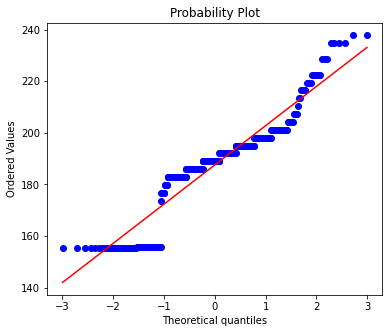

In [15]:
np.random.seed(42)

fig, ax = plt.subplots(figsize=(6, 5))
norm_sample = players_df.height_cm.sample(500)
stats.probplot(norm_sample, plot=ax);

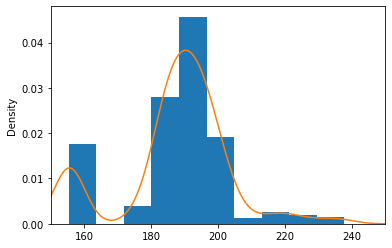

In [16]:
ax = norm_sample.plot.hist(density = True, xlim = [150, 250])
norm_sample.plot.density(ax=ax);

# Long-Tailed Distributions

* Data is generally not normally distributed.

* Assuming a normal distribution can lead to underestimation of extreme events
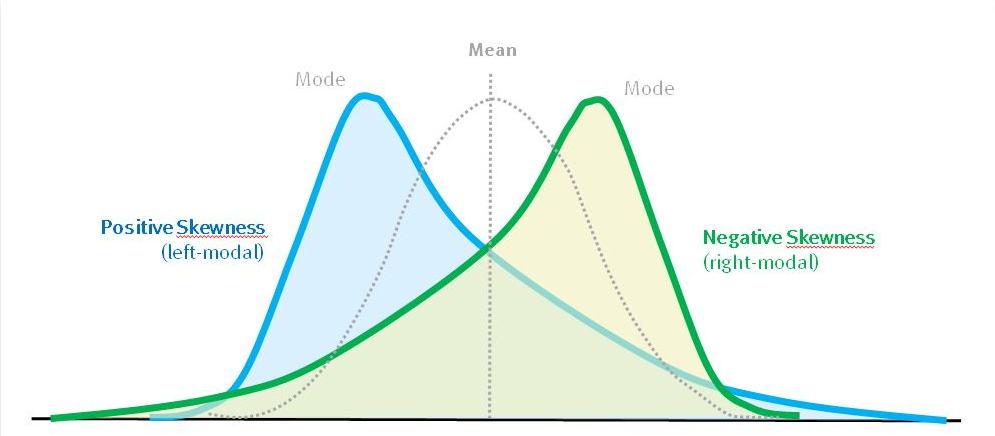
https://assetinsights.net/Glossary/G_Skewness.html

# Student's t--Distribution

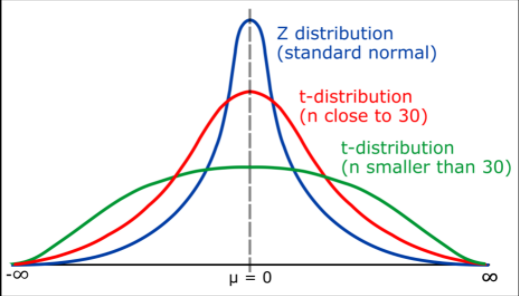
https://www.geeksforgeeks.org/students-t-distribution-in-statistics/#:~:text=Student's%20t%2Ddistribution%20or%20t,the%20pen%20name%20%E2%80%9CStudent%E2%80%9C.

# Binomial Distribution

Distribution of number of successes in x trials (Bernoulli distribution)


**Yes/No -** buy/don't buy; sell/don't sell; survive/die; and so on (there must be only 2 outcomes)

**Key Turms:**
* `Trial` - an event with a discrete outcome (r.g., a coin flip)
* `Success` - the outcome of interest for a trial 

* r - number of successes we'd like
* n - number of triels conducted
* p - probability of success in each trial

**Example:** There are 3 marbles in a bag (2 green nd 1 red). We are going to do 5 trials where we pull a marbel, note the color, and then replace the marbel.

**Question 1:** What is the prbability that we get a red marbel exactly 3 times?

In [17]:
# pmf (probability mass function)
r = 3
n = 5
p = 1/3 # one red marble out of a total of 3 marbles
result_1 = stats.binom.pmf(r, n=n, p=p) 
print(f"The probability of getting exactly 3 red marbles is: {round(result_1 * 100, 2)}%")

The probability of getting exactly 3 red marbles is: 16.46%


**Question 2:** What is the prbability of getting 3 or less red marbles?

In [18]:
# cdf (Cumulative Distribution Function)
result_2 = stats.binom.cdf(r, n=n, p=p) 
print(f"The probability of getting 3 or less red marbles is: {round(result_2 * 100, 2)}%")

The probability of getting 3 or less red marbles is: 95.47%


**Question 3:** What is the prbability that we get 3 or more red marbles?

In [19]:
result_3 = 1 - result_2
print(f"The probability of getting 3 or less red marbles is: {round(result_3 * 100, 2)}%")

The probability of getting 3 or less red marbles is: 4.53%


# Poisson Distributionns

**Poisson process -** calculates the number of times an event accurs in a period of time, in a partcular area, or even some distance. Withinin any other kind of measurment.

**It has particular characteristics:**
* 1. The experiment counts the number of accurances of event over some other measurement.
* 2. The mean is the same for each interval.
* 3. The count of events in eah interval is independent of the other interval.
* 4. The intervals don't overlap.

Below examples are taken from - https://www.statology.org/poisson-distribution-python/

Values:  [2 6 3 3 6 2 2 3 5 1]
Mean of the values above:  3


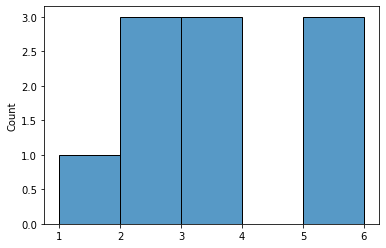

In [63]:
np.random.seed(123)

#generate random values from Poisson distribution with mean=3 and sample size=10
mean_ = 3
size = 10
result = stats.poisson.rvs(mu = mean_, size = size)
print("Values: ", result)
print("Mean of the values above: ", round(result.mean()))
sns.histplot(result);

### Calculate Probabilities Using a Poisson Distribution
https://www.statology.org/poisson-distribution-python/

* `λ`: mean number of successes that occur during a specific interval
* `k`: number of successes

**Example 1 (a fixed number of successes):**
* A store sells 3 apples per day on average. What is the probability that they will sell 5 apples on a given day? 

In [70]:
lambda_ = 3
successes = 5
result = stats.poisson.pmf(k = successes, mu = lambda_)
print(f"The probability of selling 5 apples on a given day is {round(100 * result, 2)}%")

The probability of selling 5 apples on a given day is 10.08%


In [43]:
stats.poisson.pmf(5, 3)

0.10081881344492458

**Example 2:**
* A certain store sells 7 footballs per day on average. What is the probability that this store sells 4 or `less` footballs in a given day?

In [75]:
lambda_ = 7
successes = 4
result = stats.poisson.cdf(k = successes, mu = lambda_)
print(f"The probability that the store sells four or less footballs in a given day is {round(100 * result, 2)}%")

The probability that the store sells four or less footballs in a given day is 17.3%


**Example 3:**
* A certain store sells 15 cans of tuna per day on average. What is the probability that this store sells `more than` 20 cans of tuna in a given day?

In [74]:
lambda_ = 15
successes = 20
result = 1 - stats.poisson.cdf(k = successes, mu = lambda_)
print(f"The probability that the store sells more than 20 cans in a given day is {round(100 * result, 2)}%")

The probability that the store sells more than 20 cans in a given day is 8.3%


# Exponential Distribution
https://www.statology.org/exponential-distribution-real-life-examples/

https://courses.lumenlearning.com/introstats1/chapter/the-exponential-distribution/
* **λ**: the rate parameter (calculated as λ = 1/μ)

**$F(x; λ) = 1 – e^{-λx}$**

The probability distribution of the time between events in a Poisson point process. The exponential distribution describes the time for a continuous process to change state.

**Poisson** distribution deals with the number of occurrences of an event in a given period and **exponential distribution** deals with the time between these events.

**Example 1:**
* The mean number of minutes between eruptions for a certain geyser is 40 minutes. If a geyser just erupts, what is the probability that we’ll have to wait `less than` 50 minutes for the next eruption?

In [100]:
lambda_ = 1/40
x = 50
result = 1 - np.exp(-lambda_ * x)
print(f"The probability that we'll have to wait less than 50 min. for the next eruption is {round(100*result, 2)}%")

The probability that we'll have to wait less than 50 min. for the next eruption is 71.35%


**Example 2:**
* An earthquake occurs every 400 days in a certain region, on average. After an earthquake occurs, find the probability that it will take `more than` 500 days for the next earthquake to occur?

In [101]:
lambda_ = 1/400
x = 500
result = 1 - (1 - np.exp(-lambda_ * x))
print(f"The probability that it will take more than 500 days for the next earthquake to occur is {round(100 * result, 2)}%")

The probability that it will take more than 500 days for the next earthquake to occur is 28.65%


**Example 3:**
* A bank receives a new call every 10 minutes, on average. After a customer calls, find the probability that a new customer calls `within` 10 to 15 minutes.

**$P(10<X<15) = P(X<15) - P(X<10)$**

In [107]:
lambda_ = 1/10
x_1 = 10
x_2 = 15
result = (1 - np.exp(-lambda_ * x_2)) - (1 - np.exp(-lambda_ * x_1))
print(f"The probability that a new customer calls with 10 to 15 minutes is {round(100 * result, 2)}%")

The probability that a new customer calls with 10 to 15 minutes is 14.47%


The key parameter in a Poisson distribution is $\lambda$ (lambda). This is the mean number of events that accurs in a specified interval of times or space.  $\lambda$ needs to be relatively consistent across a time period. This usually isn't an issue if we use a small enough time period.

<div class="alert alert-block alert-success">
<br>
    
The key parameter in a `Poisson Distribution` and `Exponential Distribution` is  `𝜆`  (lambda). This is the mean number of events that accurs in a specified interval of times or space.  **𝜆  needs to be relatively consistent across a time period.** This usually isn't an issue if we use a small enough time period.
</div>